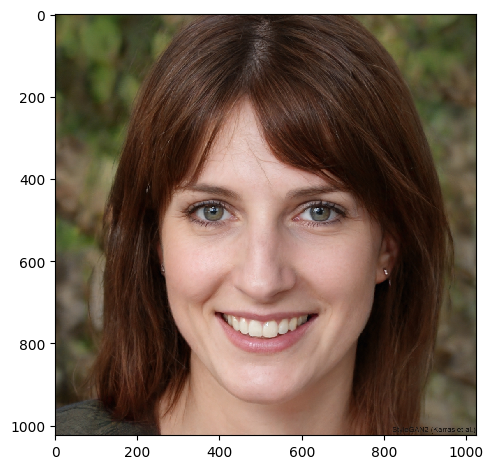

Original Image Dimensions: (1024, 1024, 3)
Original Image Size: 503.56 KB


In [1]:
from skimage import io
import numpy as np
import os

# Load the image
image_path = 'img.jpg'  # Replace with your image file name
image = io.imread(image_path)

# Display the original image
io.imshow(image)
io.show()

# Display the image dimensions and size
print(f"Original Image Dimensions: {image.shape}")
print(f"Original Image Size: {os.path.getsize(image_path) / 1024:.2f} KB")


In [2]:
# Get image dimensions
rows, cols = image.shape[0], image.shape[1]

# Normalize the image
image = image / 255.0

# Reshape the image into a 2D array where each row is a pixel, and each column is a color channel (RGB)
X = image.reshape(rows * cols, 3)


In [3]:
K = 40  # Number of clusters
max_iters = 100  # Number of iterations for K-Means


In [4]:
import random

def init_centroids(X, K):
    centroids = random.sample(list(X), K)
    return np.array(centroids)

initial_centroids = init_centroids(X, K)


In [5]:
def closest_centroids(X, centroids):
    K = centroids.shape[0]
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    idx = np.argmin(distances, axis=1)
    return idx

def compute_centroids(X, idx, K):
    centroids = np.array([X[idx == i].mean(axis=0) for i in range(K)])
    return centroids


In [6]:
def run_kMeans(X, initial_centroids, max_iters):
    centroids = initial_centroids
    for _ in range(max_iters):
        idx = closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters)


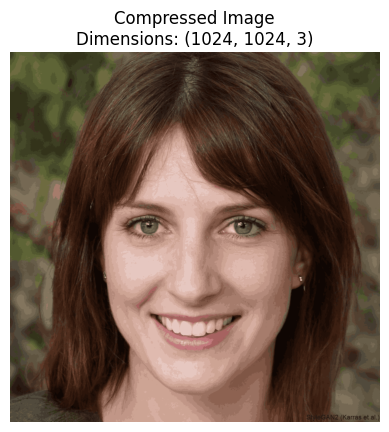

Compressed Image Dimensions: (1024, 1024, 3)
Compressed Image Size: 146.89 KB


In [7]:
import matplotlib.pyplot as plt
from PIL import Image

# Find the closest centroids for each pixel
idx = closest_centroids(X, centroids)

# Reconstruct the image using the centroids
X_recovered = centroids[idx]
X_recovered = X_recovered.reshape(rows, cols, 3)

# Convert the array to an image
compressed_image_path = 'img_compressed.jpg'
compressed_image = Image.fromarray((X_recovered * 255).astype(np.uint8))
compressed_image.save(compressed_image_path, format='JPEG', quality=85)

# Display the compressed image
plt.imshow(X_recovered)
plt.title(f"Compressed Image\nDimensions: {X_recovered.shape}")
plt.axis('off')
plt.show()

# Display the compressed image dimensions and size
print(f"Compressed Image Dimensions: {X_recovered.shape}")
print(f"Compressed Image Size: {os.path.getsize(compressed_image_path) / 1024:.2f} KB")


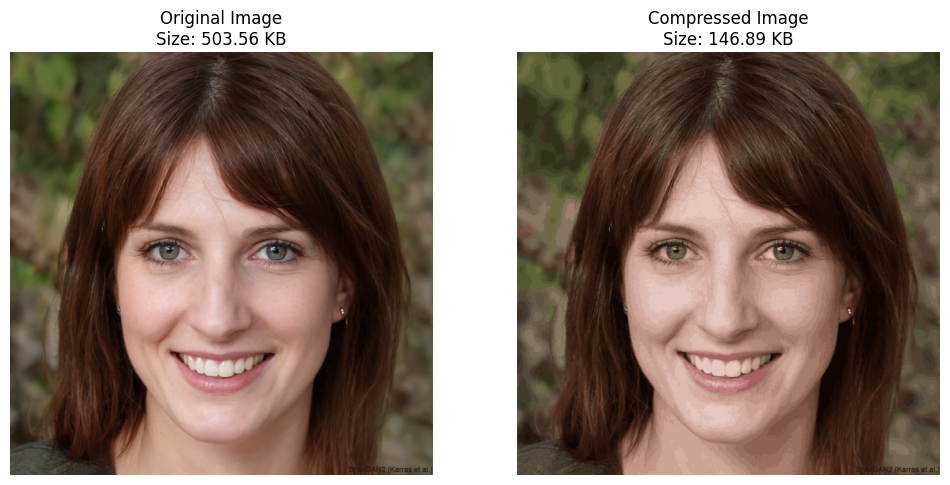

In [8]:
import matplotlib.pyplot as plt
from skimage import io
import os

# Load the compressed image
image_compressed = io.imread(compressed_image_path)

# Display original and compressed images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(image)
axes[0].set_title(f"Original Image\nSize: {os.path.getsize(image_path) / 1024:.2f} KB")
axes[0].axis('off')

# Compressed image
axes[1].imshow(image_compressed)
axes[1].set_title(f"Compressed Image\nSize: {os.path.getsize(compressed_image_path) / 1024:.2f} KB")
axes[1].axis('off')

plt.show()
